In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.measure import label, regionprops
from skimage.morphology import convex_hull_image, remove_small_objects 
from scipy.ndimage import binary_fill_holes
import os
# from skimage.io import imread, imsave

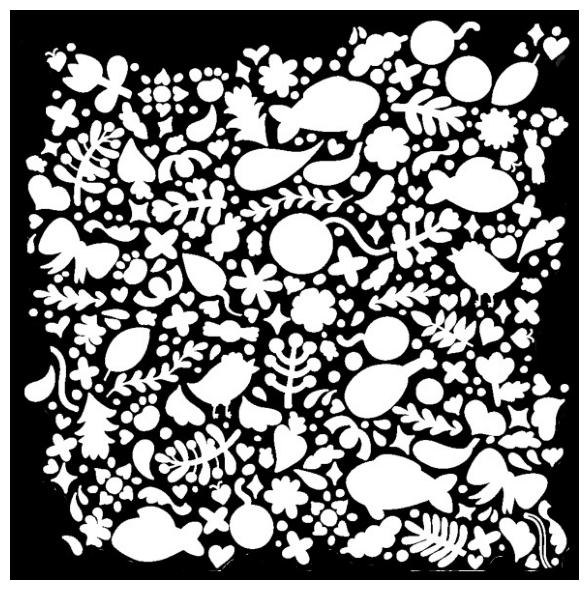

In [2]:
# Carregar a imagem
imagem_original_preenchida = io.imread('imagem_1_2.jpeg')

# Mostrar os resultados
plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.imshow(imagem_original_preenchida, cmap='gray')
# plt.title("Imagem Preenchida")
plt.axis("off")

plt.tight_layout()
plt.show()

In [8]:
# Converter para escala de cinza
imagem_cinza = rgb2gray(imagem_original_preenchida)

# Binarizar a imagem usando o método Otsu
limiar = threshold_otsu(imagem_cinza)
imagem_binaria = imagem_cinza > limiar

# Remover ruídos pequenos
imagem_limpa = remove_small_objects(imagem_binaria, min_size=00)

# Rotular os componentes conexos
rotulos, num_componentes = label(imagem_limpa, connectivity=2, return_num=True)

In [9]:
print(rotulos)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


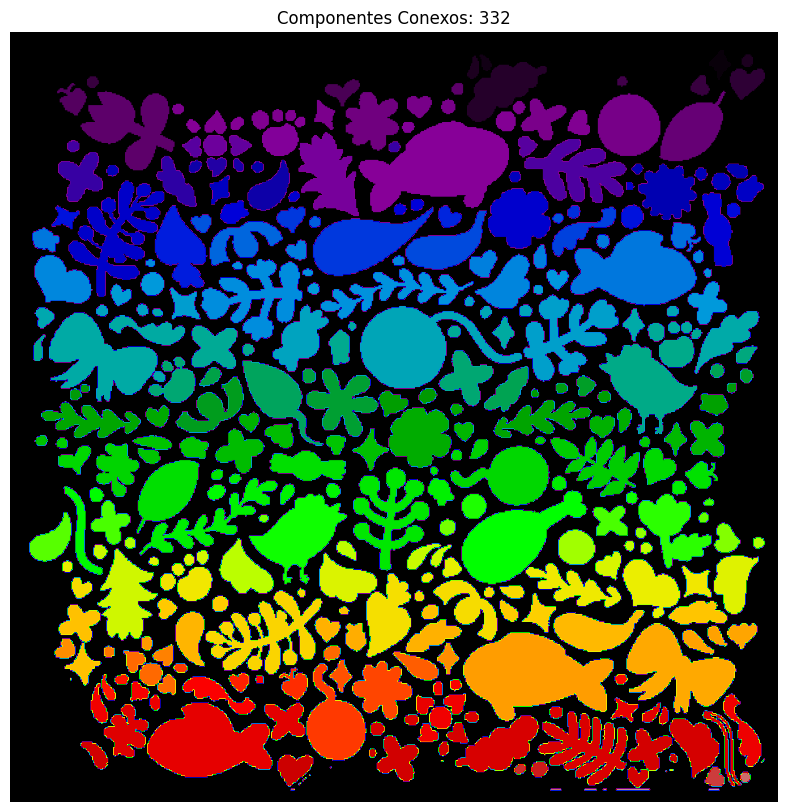

Número de componentes conexos: 332


In [10]:
# Mostrar a imagem rotulada
plt.figure(figsize=(10, 10))
plt.title(f'Componentes Conexos: {num_componentes}')
plt.imshow(rotulos, cmap='nipy_spectral')
plt.axis('off')
plt.show()

print(f"Número de componentes conexos: {num_componentes}")


In [ ]:
# Criar pasta para salvar os componentes
output_folder = "componentes_conexos"
os.makedirs(output_folder, exist_ok=True)

# Criar uma imagem para cada componente conexo
for region in regionprops(rotulos):
    # Pegar coordenadas do bounding box do componente
    minr, minc, maxr, maxc = region.bbox
    
    # Extrair o componente da imagem original
    componente = (rotulos[minr:maxr, minc:maxc] == region.label).astype(np.uint8)
    
    # Salvar a imagem do componente
    io.imsave(os.path.join(output_folder, f"componente_{region.label}.png"), componente * 255)

    # Mostrar o componente
    plt.imshow(componente, cmap="gray")
    plt.title(f"Componente {region.label}")
    plt.axis("off")
    plt.show()

print(f"{num_componentes} componentes separados e salvos na pasta '{output_folder}'.")
